In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score, classification_report ,  confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tabulate import tabulate



In [4]:
# Load the dataset
data = pd.read_csv("cardio_dataset.csv", delimiter=",")

In [5]:
# Display the shape of the dataset (number of rows and columns)
print("Dataset Shape:", data.shape)

# Convert the first few rows of the DataFrame to a list of dictionaries for tabulate
table_data = data.head().to_dict(orient='records')

# Print the data in a nicely formatted table without headers
table = tabulate(table_data, tablefmt='grid')
print(table)

Dataset Shape: (308854, 19)
+-----------+-------------------------+-----+-----+----+----+----+-----+-----+--------+-------+-----+-------+-------+-----+---+----+----+----+
| Poor      | Within the past 2 years | No  | No  | No | No | No | No  | Yes | Female | 70-74 | 150 | 32.66 | 14.54 | Yes | 0 | 30 | 16 | 12 |
+-----------+-------------------------+-----+-----+----+----+----+-----+-----+--------+-------+-----+-------+-------+-----+---+----+----+----+
| Very Good | Within the past year    | No  | Yes | No | No | No | Yes | No  | Female | 70-74 | 165 | 77.11 | 28.29 | No  | 0 | 30 |  0 |  4 |
+-----------+-------------------------+-----+-----+----+----+----+-----+-----+--------+-------+-----+-------+-------+-----+---+----+----+----+
| Very Good | Within the past year    | Yes | No  | No | No | No | Yes | No  | Female | 60-64 | 163 | 88.45 | 33.47 | No  | 4 | 12 |  3 | 16 |
+-----------+-------------------------+-----+-----+----+----+----+-----+-----+--------+-------+-----+-------+-----

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [12]:
# Separate features and target variable
X = data.drop(columns=['Heart_Disease'])
y = data['Heart_Disease']


In [13]:
# Apply label encoding to 'General_Health'
label_encoder = LabelEncoder()
X['General_Health'] = label_encoder.fit_transform(X['General_Health'])


In [14]:
# Print unique values in the 'Checkup' column
checkup_values = data['Age_Category'].unique()
print("Unique Checkup Values:")
print(checkup_values)

Unique Checkup Values:
['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']


In [16]:
# Apply label encoding to categorical features
label_encoder = LabelEncoder()
for feature in X.columns:
        X[feature] = label_encoder.fit_transform(X[feature])
print(X.head())

   General_Health  Checkup  Exercise  Skin_Cancer  Other_Cancer  Depression  \
0               3        2         0            0             0           0   
1               4        4         0            0             0           0   
2               4        4         1            0             0           0   
3               3        4         1            0             0           0   
4               2        4         0            0             0           0   

   Diabetes  Arthritis  Sex  Age_Category  Height_(cm)  Weight_(kg)   BMI  \
0         0          1    0            10           36            9    77   
1         2          0    0            10           51          145  1226   
2         2          0    0             8           49          180  1682   
3         2          0    1            11           66          195  1267   
4         0          0    1            12           77          180   868   

   Smoking_History  Alcohol_Consumption  Fruit_Consumption  \


In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:

# Initialize models
modelLogReg = LogisticRegression(max_iter=1000)
modelDecisionTree = DecisionTreeClassifier()
modelSVC = SVC()
modelKNN = KNeighborsClassifier(n_neighbors=2)
modelGradientBoosting = GradientBoostingClassifier(n_estimators=100)
modelLDA = LinearDiscriminantAnalysis()
modelQDA = QuadraticDiscriminantAnalysis()



In [20]:
# Train models
modelLogReg.fit(X_train, y_train)
#modelDecisionTree.fit(X_train, y_train)
#modelSVC.fit(X_train, y_train)
#modelKNN.fit(X_train, y_train)
#modelGradientBoosting.fit(X_train, y_train)
#modelLDA.fit(X_train, y_train)
#modelQDA.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [21]:
 #Predictions
predLogReg = modelLogReg.predict(X_test)
#predDecisionTree = modelDecisionTree.predict(X_test)
#predSVC = modelSVC.predict(X_test)
#predKNN = modelKNN.predict(X_test)
#predGradientBoosting = modelGradientBoosting.predict(X_test)
#predLDA = modelLDA.predict(X_test)
#predQDA = modelQDA.predict(X_test)


In [24]:

# Create an array to hold all predictions
# all_predictions = np.array([predLogReg, predDecisionTree, predSVC, predKNN, predGradientBoosting, predLDA, predQDA])
all_predictions = np.array([predLogReg])


In [25]:
# Compare predictions using accuracy
for idx, predictions in enumerate(all_predictions):
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model {idx+1} Accuracy: {accuracy:.2f}")

Model 1 Accuracy: 0.92


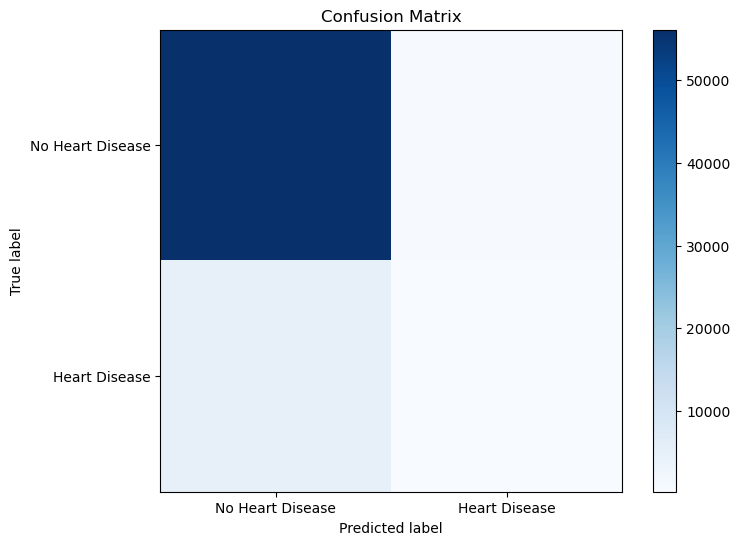

In [17]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
classes = ['No Heart Disease', 'Heart Disease']
tick_marks = [0, 1]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

